#   1- Business requirement/understanding.

# **Problem Formulation** 
We want to find and predict the **product ratings** given the other features known for a product on Wish.com.




*   **Input** :- Features collected from merchants and products.
*   **Output** :- Predected rating for product.


*   **Data Mining Function** :- Manipulating ,analyzing , preprocessing the data. 
*   **Challenges** ▶ : 
    1.   Nan cells.
    2.   Unused and unimportnat column.
    3.   Convert the dtype.
    4.   convert strings by One Hot encoding.
*   **Impact** ▶ : Predicting the rating of products and study what the market wants.






Copyrights 2022 Master of science - Queens University - by/Mahmoud Khorshed

# 1- import libraries and Data

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical data visualization
sns.set()
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

from time import time
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import classification_report,f1_score

#Grid Search
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV



#Models 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



## 1.2 - load Data

### install kaggle and get token Kaggle 

In [66]:
# !pip install -q kaggle
# !mkdir ~/.kaggle
# from google.colab import files
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [67]:
# !kaggle competitions download -c cisc-873-dm-f22-a1   #Download data of competition "Product"

 **read data from the *path***

I have an **idea** for not copying the **preprocessing** way :-
* I could merge the train and test data . 
* make same preprocssing .
* split them before **OHE**  .

I know that this is unlogical way because in industry , We don't know the test data , but to make the preprocessing easier.   

In [68]:
pd.set_option('display.max_colwidth', None)  #to display all row with its data
pd.options.display.max_rows = 1500
#Load Data
train_new=pd.read_csv('/content/train_new.csv',index_col='id')  #(1094, 34)
        
test_new=pd.read_csv('/content/test_new.csv',index_col='id')   #(479, 33)  without rating
test_new["rating"] = pd.NaT   #add rating column  with empty values

frames = [train_new,test_new]    
data = pd.concat(frames)    #(1094+479= 1573, 34)    

data.head(2)  #TO check

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
272,8.0,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops,Loose,tank top,Women's Fashion,Fashion,sleeveless tops,sleeveless,Women,Lace,Casual,summerampspring",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_577fb2b368116418674befd9.jpg,summer,2020-08
1515,8.0,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsuit,sexy bikini,paddedfringetasselbikinibeachswimwear,Swimwear,padded,Women's Fashion,Fashion,sexy,fashiondesign,high waist,Tassels,Waist,beach wear,Swimsuit,Bikini,splitswimsuit,Women,Monokini Swimsuits,Swimming",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08


# 2- Exploratory *Data*

EDA explained using sample Data set:
To share my understanding of the concept and techniques I know,I’ll take an example of Data of product rating data set which is available on Iwish.com Machine Learning Repository and try to catch hold of as many insights from the data set using EDA.
To starts with,I imported necessary libraries (for this example pandas, numpy,matplotlib and seaborn) and loaded the data set. 

In [69]:
# print first and last few rows of the dataset
data.tail(2)



,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
626,3.0,3,EUR,100,1,NaT,8,0,0,0,0,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Indoor Slippers,outdoorslipper,Slippers,Women's Fashion,Outdoor,slippers women,furryslipper,Beach slippers,furslide,furslipperswomen,Women",black,34,3,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,lkwelyly,hey1827,"87 % avis positifs (1,086 notes)",1086,4.056169,5c6d6c28619caa1d94891d06,0,NaN,summer,2020-08
196,13.0,11,EUR,100,1,NaT,4,0,0,0,0,"Summer,Plus Size,2pieceset,Women,slim,T Shirts,Shorts,tshirtandtop,Women's Fashion,twopieceoutfit,printed,Tie Dye,Dyes,sexy,shortsforwomen,Outfits,Fashion,Women Fashion,Slim Fit",yellow,S,29,Expediere Standard,3,0,42,50,1.0,Quantité limitée !,CN,rtgh,rtgh710402e4b24511e6b69106d0c1a90220,"86% Feedback pozitiv (45,151 rating)",45151,4.032956,5836e38728f25753fe6af6a8,0,NaN,summer,2020-08


**Get the shape of data**

In [70]:
data.shape # print the shape of Data

(1573, 33)

* Dataset comprises of 1573 observations and 13 Features .





In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 272 to 196
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1094 non-null   object 
 6   rating_count                  1573 non-null   int64  
 7   badges_count                  1573 non-null   int64  
 8   badge_local_product           1573 non-null   int64  
 9   badge_product_quality         1573 non-null   int64  
 10  badge_fast_shipping           1573 non-null   int64  
 11  tags                          1573 non-null   object 
 12  product_color                 1532 non-null   object 
 13  pr



*   Data has  float , objects and integer values.
*   There are variable columns have null/missing values.



The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [72]:
data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,889.659250,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,1983.928834,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,855.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


* Here as you can notice mean value is less than median value of each column which is represented by 50%(50th percentile) in index column.
*There is notably a large difference between 75th %tile and max values of predictors “price	”,”retail_price”,”units_sold”.
* Thus observations 1 and 2 suggests that there are extreme values-Outliers in our data set.





**Get the columns and check unique values data**

In [73]:
# features=list(data.columns)

# for col in range(len(features)):   
#     count = len(data[features[col]].unique()) # printing unique values of each Feature
#     print("Number of unique values in %s ="%features[col],count)

# Another Easy WAy to do that without any increase in complexity by For Loop
data.nunique()


price                            127
retail_price                     104
currency_buyer                     1
units_sold                        15
uses_ad_boosts                     2
rating                             6
rating_count                     761
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                            1230
product_color                    101
product_variation_size_id        106
product_variation_inventory       48
shipping_option_name              15
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              94
inventory_total                   10
has_urgency_banner                 1
urgency_text                       2
origin_country                     6
merchant_title                   958
merchant_name                    957
merchant_info_subtitle          1058
merchant_rating_count            917
m

**Get the unique values of label "Rating" of data**

In [74]:
data['rating'].unique()  #how many unique values and what they are.

array([4.0, 3.0, 5.0, 2.0, 1.0, 6.0, NaT], dtype=object)

* Target variable/Dependent variable is discrete and categorical in nature.
* “rating” score scale ranges from 1 to 6.

In [75]:
data[['rating']].value_counts() 
     #display hom many product x takes rating y

rating
4.0       774
5.0       170
3.0       135
2.0        12
1.0         2
6.0         1
dtype: int64

* where 1 being poor and 6 being the best.
1,6,2  ratings are weak by any observation.

**To use linear regression for modelling,its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.**

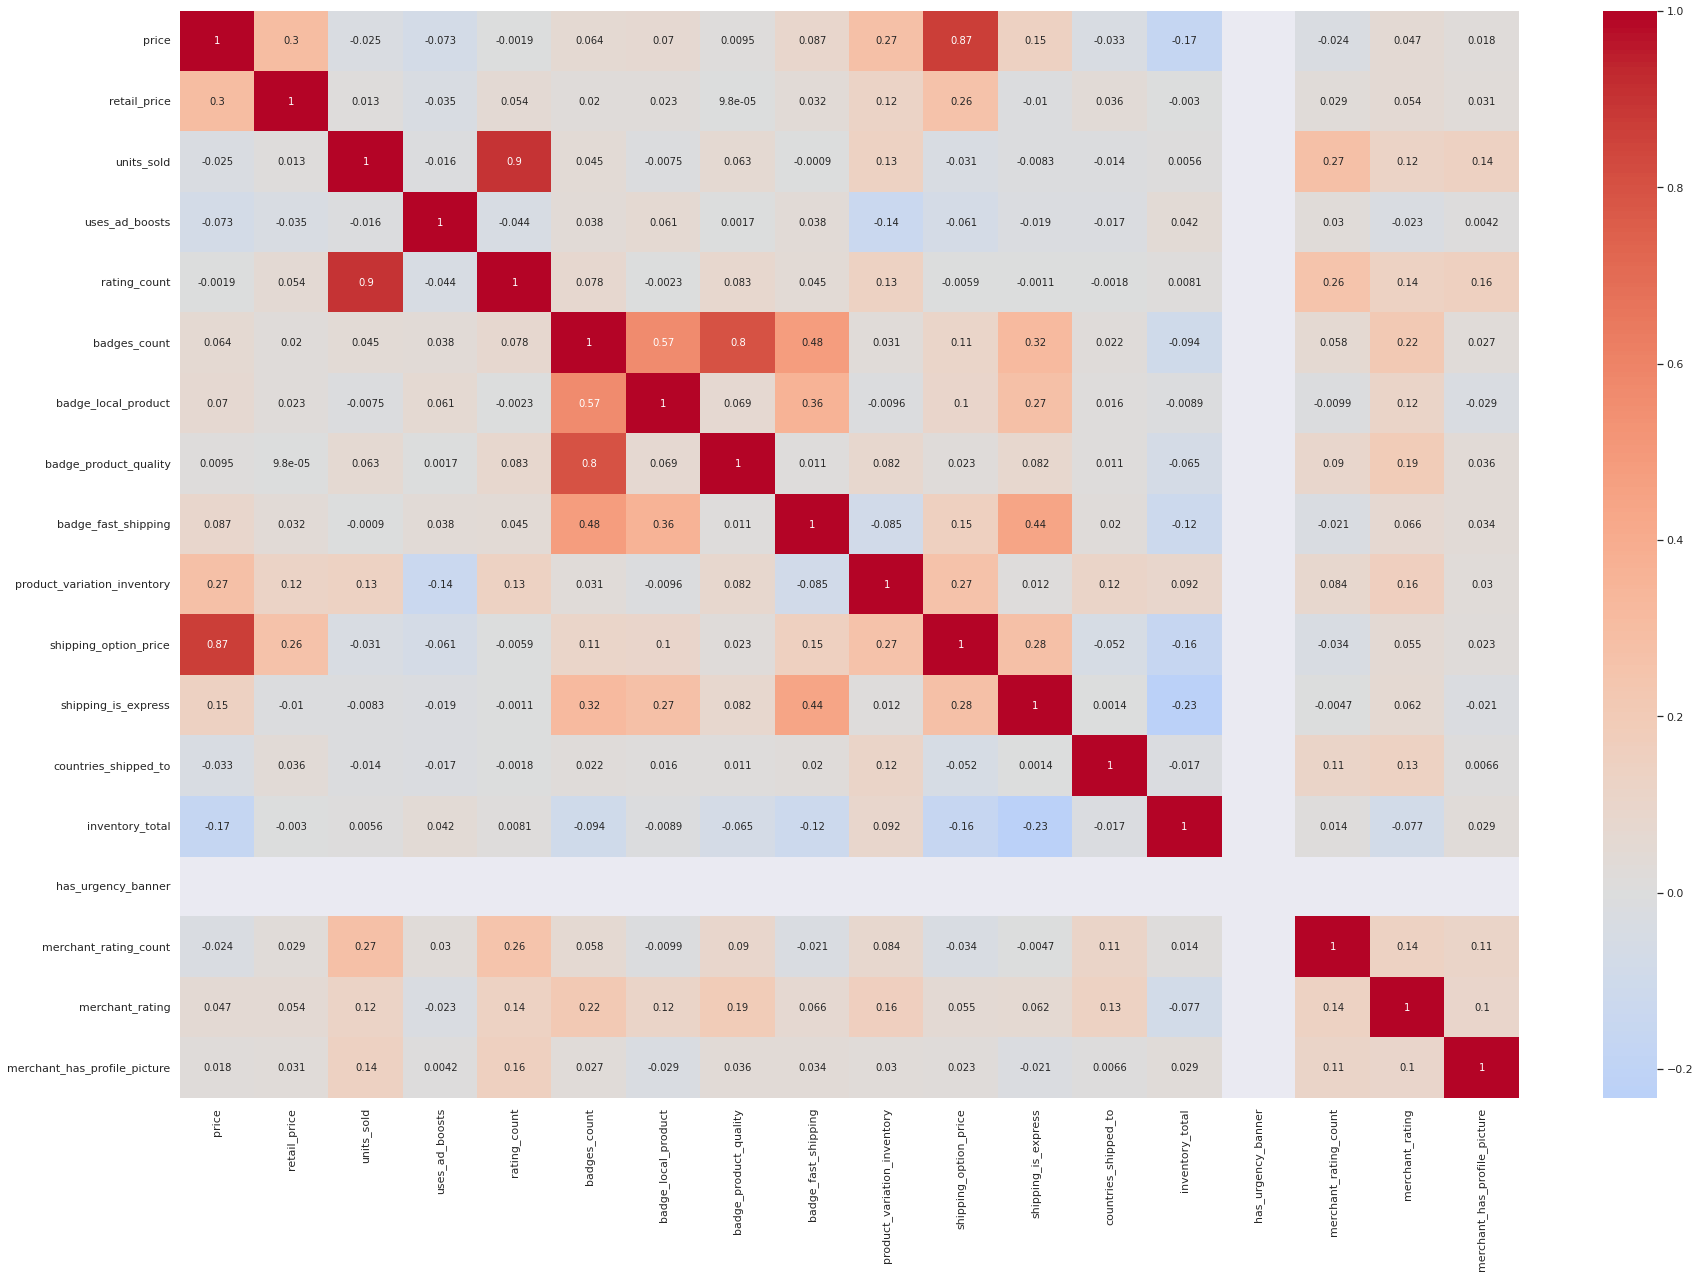

In [76]:
# heat correlation map to check to for synonym columsn (identical or almost identical faetures)
plt.figure(figsize = (30, 20))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', center = 0)
plt.show()

* Dark shades represents positive correlation while lighter shades represents negative correlation.
* I set annot=True to get values by which features are correlated to each other in grid-cells.

It’s a good practice to remove correlated variables during feature selection.


* Here we can infer that “shipping option price” has strong positive correlation with “price” whereas it has strong negative correlation with “rating count”.
* “badge product quality” and “Merchant has profile picture” has almost no correlation with “price”.
* Since correlation is zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features in case you’re applying Linear Regression model to the dataset.

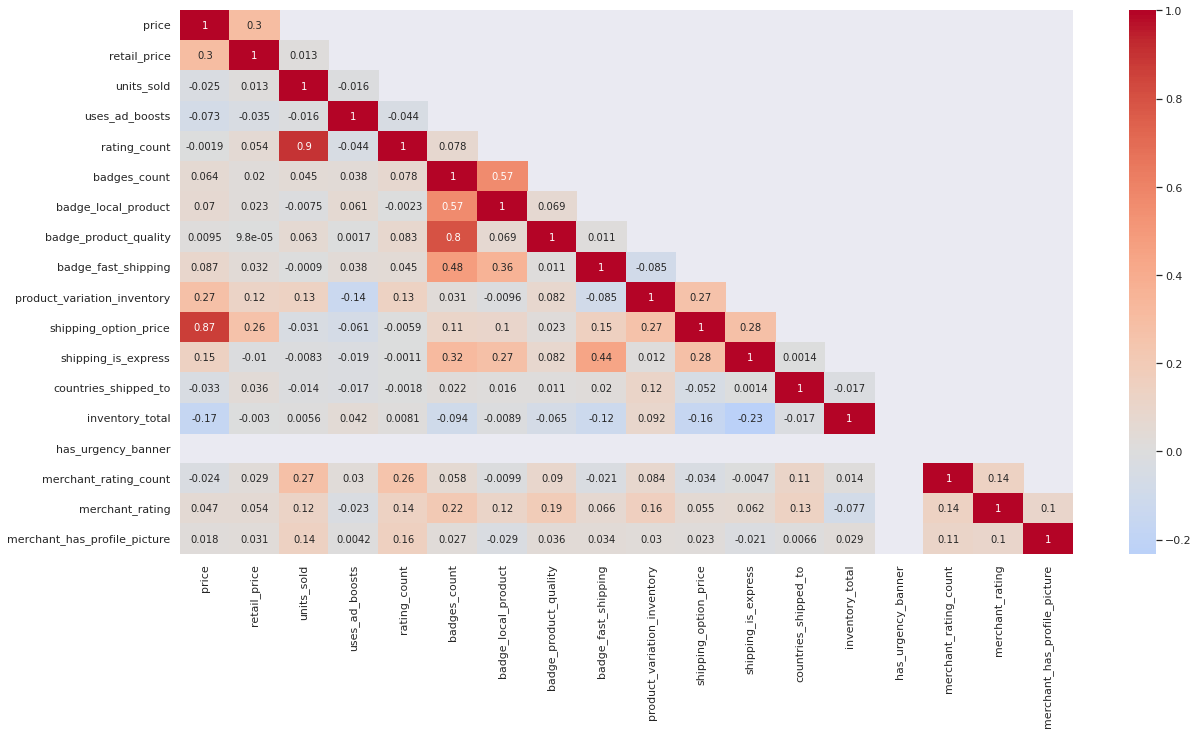

In [77]:
Lower_tri = data.corr().where(np.tril(np.ones(data.corr().shape),k=1).astype(np.bool))

# heat correlation map to check to for synonym columsn (identical or almost identical faetures)
plt.figure(figsize = (20, 10))
sns.heatmap(Lower_tri, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

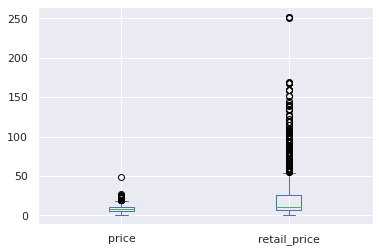

In [78]:
data[['price','retail_price']].plot.box()


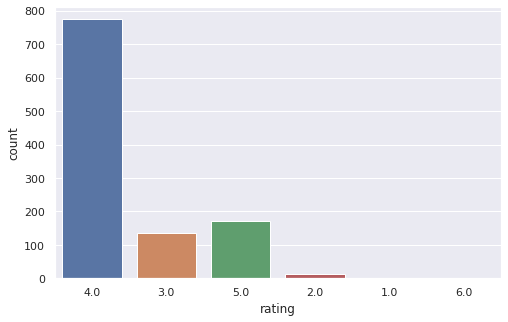

In [79]:
#Count plot Rating
plt.figure(figsize=(8,5))
ax = sns.countplot(x="rating", data=data)
plt.show()

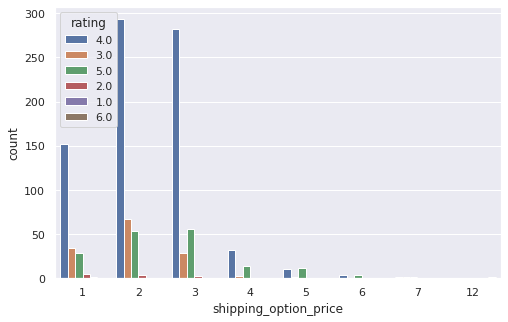

In [80]:
#Count plot Rating
plt.figure(figsize=(8,5))
ax = sns.countplot(x="shipping_option_price" ,hue='rating' , data=data)
plt.show()

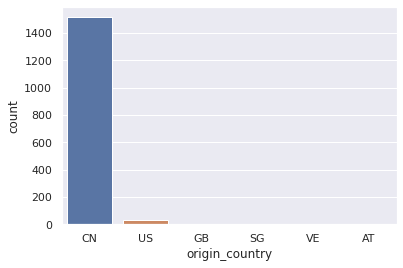

In [81]:
sns.countplot('origin_country', data=data)

# 3-Data preprocessing

## 3.1 Columns

#### 1- rating

It is clear that rating number 6.0 and 1.0 is outliers , So we should replace them them.

**Remove outliers**

In [82]:
# Replace these row indexes from dataFrame
data['rating'] = data['rating'].replace(6.0, 5.0)  #replace 6 with its near values 5
data['rating'] = data['rating'].replace(1.0, 2.0)  #replace 1 with its near values 2


In [83]:
data[['rating']].value_counts() 
     #display hom many product x takes rating y

rating
4.0       774
5.0       171
3.0       135
2.0        14
dtype: int64

#### 2- price & retail_price with rating 
**Feature Engineering v1.0**

* Price is the discount after retail_price
So i have an idea ❎:
  * 1- get the difference between them .
  * 2- if price > retail_price , So that it could be bad price  so i will map it to lower ratings   2
  * 3- if price < retail_price  , it is good , mapping it to  4 or 5 rating
  * 4- it price = retail_price  , it is normal , to rating 3 


In [84]:
conditions = [
             data['price'] > data['retail_price'],data['price'] == data['retail_price'], 
             data['price'] < data['retail_price']]
choices = [0, 1,2]

data['Difference_in_price'] = np.select(conditions, choices)
print(data['Difference_in_price'].unique())  #[0,2,1]

# 0 is expressed with bad Fake  >>>>>>>  gives rate = 2
# 1 is expressed with good pricing not >>>>>> cheating gives rate = 4
# 2 is expressed with normal pricing >>>>>> gives rate = 3

conditions = [
             data['Difference_in_price'] == 0, 
             data['Difference_in_price'] == 1,
              data['Difference_in_price'] == 2]
choices = [2,4,3]
data['Rating_difference'] = np.select(conditions, choices)
print(data['Rating_difference'].unique())  # [2,3,4]


[0 2 1]
[2 3 4]


### 3- Drop columns

#### It is clear that there are features with 1  unique values that it couldn't affect our analysis so we could drop them to reduce the complexity. 
[currency_buyer -  urgency_text -theme - crawl_month ]
[Origin_country]
[merchant_id]

In [85]:
data=data.drop(['currency_buyer','urgency_text'	,'theme','crawl_month'],axis=1)
data.head(2);

**Origin country**

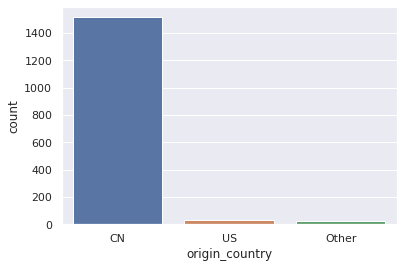

In [86]:
# Since this feature consists mainly of US and China we can combine the rest into others
data['origin_country'] = data['origin_country'].replace('VE', 'Other')
data['origin_country'] = data['origin_country'].replace('AT', 'Other')
data['origin_country'] = data['origin_country'].replace('SG', 'Other')
data['origin_country'] = data['origin_country'].replace('GB', 'Other')
data['origin_country'] = data['origin_country'].replace(np.nan, 'Other')
# visual check to see if it correctly categorized everything
sns.countplot('origin_country', data=data);

Now we can see that almost **all products from China** so we could drop this columns 

In [87]:
data = data.drop(['origin_country'],axis=1)


#### Also we could remove any features contains ids >>>> 

[merchant_id]




In [88]:
data = data.drop(['merchant_id'],axis=1)


#### We could remove another features that it hasn't any logical effect on our analysis .
[merchant_profile_picture -  merchant_info_subtitle - merchant_name -  -shipping_option_name  ]
* We couldn't use merchant title and name because we don't need to thier name to predict rating of a **(Product)**.
* We could use merchant_rating instead of its info in ['merchant_info_subtitle'].
* ['merchant_info_subtitle'] is a mix between two features ( merchant_rating_count - merchant_rating),Also i noticed that the percentage of rating from (4.7)   ) .


In [89]:
data = data.drop(['merchant_profile_picture','merchant_info_subtitle','merchant_name','shipping_option_name'],axis=1)
data;

### 4- tags  
**Feature Engineering v2.0**

I extracted the count of tags for products and put their count in new column ['tag_count']

In [90]:
# breaking up the tag column to see the number of tags per row. 
def tag_count(tags):
    prod_tags =tags.split(',')
    return len(prod_tags)
    
# replaced tags with tag_count from above to the data
data['tag_count'] = data['tags'].apply(tag_count)
data.drop(['tags'], axis=1, inplace=True)


### 5- product color

In [91]:
data['product_color'].str.lower();
data['product_color'].value_counts()

black                  302
white                  254
yellow                 105
blue                    99
pink                    99
red                     93
green                   90
grey                    71
purple                  53
armygreen               31
winered                 28
navyblue                28
orange                  27
multicolor              20
beige                   14
khaki                   12
lightblue               12
gray                    11
white & green           10
rosered                  8
skyblue                  8
coffee                   7
brown                    7
darkblue                 6
floral                   5
rose                     5
lightpink                4
navy                     4
fluorescentgreen         4
leopard                  4
black & green            4
lightgreen               3
orange-red               3
camouflage               3
black & white            3
White                    3
Black                    3
c

In [92]:
# Replacing different variations of colors into one and change missing values to OTHER

import re  

"""
RegEx Module
Python has a built-in package called re, which can be used to work with Regular Expressions.
"""
Dual = re.compile(".*&")
Dual = list(filter(Dual.match, data.product_color.apply(str))) #  get any color contains " & "
data['product_color'] = data['product_color'].replace(Dual,'Dual') 
data['product_color'] = data['product_color'].replace(['blackwhite'],'Dual') 



blue = re.compile(".*lue")      
blue = list(filter(blue.match, data.product_color.apply(str))) #  get any color contains " lue "
data['product_color'] = data['product_color'].replace(blue,'blue')   
data['product_color'] = data['product_color'].replace(['navy','star'],'blue')   

red = re.compile(".*red")
red = list(filter(red.match, data.product_color.apply(str))) #  get any color contains " lue "
data['product_color'] = data['product_color'].replace(red,'red')
data['product_color'] = data['product_color'].replace(['wine','burgundy','RED','jasper','claret'],'red')


green = re.compile(".*green")
green = list(filter(green.match, data.product_color.apply(str))) #  get any color contains " lue "
data['product_color'] = data['product_color'].replace(green,'green')   
data['product_color'] = data['product_color'].replace(['army'],'green')   

pink = re.compile(".*ink")
pink = list(filter(pink.match, data.product_color.apply(str))) #  get any color contains " lue "
data['product_color'] = data['product_color'].replace(pink,'pink')   
data['product_color'] = data['product_color'].replace(['rose'] , 'pink')

data['product_color'] = data['product_color'].replace(['lightkhaki','beige','khaki','brown','coffee','camel','nude'] , 'beige')
data['product_color'] = data['product_color'].replace(['floral','camouflage','leopardprint','leopard','rainbow'] , 'multicolor')
data['product_color'] = data['product_color'].replace(['White','whitefloral','ivory','offwhite','whitestripe'] , 'white')
data['product_color'] = data['product_color'].replace(['Black','coolblack','offblack'] , 'black')
data['product_color'] = data['product_color'].replace(['lightyellow','gold','rosegold','tan'] , 'yellow')
data['product_color'] = data['product_color'].replace(['gray','silver','lightgray','greysnakeskinprint','lightgrey'] , 'grey')
data['product_color'] = data['product_color'].replace(['apricot'] , 'orange')

data['product_color'] = data['product_color'].replace([np.nan,'lightpurple','violet'], 'other')  #replace null values with other 



In [93]:
data['product_color'].value_counts()

black         308
white         262
blue          165
red           147
green         138
pink          112
yellow        110
grey           87
purple         53
beige          44
other          43
Dual           41
multicolor     34
orange         29
Name: product_color, dtype: int64

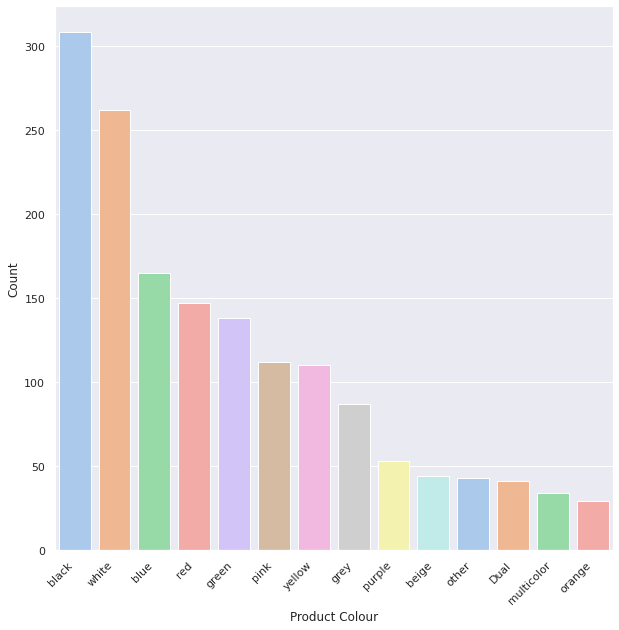

In [94]:
# graph to look at size distribution to see if it correctly categorized everything
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_color',
              palette="pastel",
              data = data,
              order = data['product_color'].value_counts().index,
              ax = ax)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()



Referrence:-

* https://www.w3schools.com/python/python_regex.asp
* https://www.codegrepper.com/code-examples/python/how+to+search+in+list+using+regex

### 6-product_variation_size_id

In [95]:
data['product_variation_size_id'].value_counts()

S                               641
XS                              356
M                               200
XXS                             100
L                                49
S.                               18
XL                               17
XXL                              15
XXXS                              6
XS.                               5
4XL                               5
Size S                            5
s                                 5
SIZE XS                           4
2XL                               4
M.                                4
Size-XS                           4
34                                3
SizeL                             3
Size-S                            3
33                                3
10 ml                             3
2pcs                              3
Suit-S                            2
S(bust 88cm)                      2
SIZE-XXS                          2
XXXXL                             2
5XL                         

In [96]:
# Replacing different variations of sizes into one

XS = re.compile(".*XS")
XS = list(filter(XS.match, data.product_variation_size_id.apply(str))) #  get any color contains " & "
data['product_variation_size_id'] = data['product_variation_size_id'].replace(XS,'XS') 

S = re.compile(".*S" )
S = list(filter(S.match, data.product_variation_size_id.apply(str))) #  get any color contains " & "
data['product_variation_size_id'] = data['product_variation_size_id'].replace(S,'S') 
data['product_variation_size_id'] = data['product_variation_size_id'].replace('s','S') 

M = re.compile(".*M")
M = list(filter(M.match, data.product_variation_size_id.apply(str))) #  get any color contains " & "
data['product_variation_size_id'] = data['product_variation_size_id'].replace(M,'M') 

L = re.compile(".*L")
L = list(filter(L.match, data.product_variation_size_id.apply(str))) #  get any color contains " & "
data['product_variation_size_id'] = data['product_variation_size_id'].replace(L,'L') 



# list anything doesn't equal name to OTHER to account for other variations
def not_exist(name):
    if name == 'XS' or name == 'S' or name == 'M'  or name == 'L':
        return name
    else:
        return "OTHER"

# adding the new categories to data['feature']
data['product_variation_size_id'] = data['product_variation_size_id'].apply(not_exist)


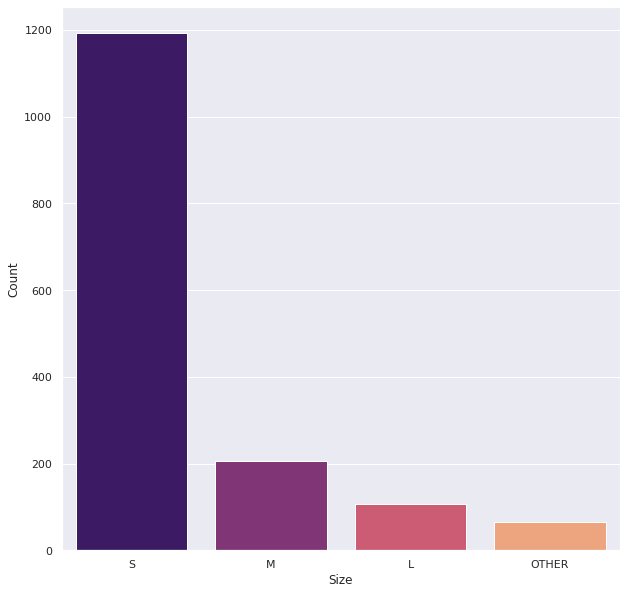

In [97]:
# graph to look at size distribution to see if it correctly categorized everything
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = data['product_variation_size_id'].value_counts().index,
              palette="magma",
              data = data,
              ax = ax)
ax.set(xlabel='Size', ylabel='Count')
plt.show()

Referrence :
* https://github.com/avalmahsa/Predicting-Wish.com-Product-Ratings/blob/222efb55992cfd5ca1d392659459c9bdc799dc92/Code.ipynb

## 3.2 Fixing Nan cell

In [98]:
# No. of nan values in data_train
data.isnull().sum()   # you could here see that rating has 479 null values ,
# but they are here because of test data 

price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                           479
rating_count                       0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
product_color                      0
product_variation_size_id          0
product_variation_inventory        0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
merchant_title                     0
merchant_rating_count              0
merchant_rating                    0
merchant_has_profile_picture       0
Difference_in_price                0
Rating_difference                  0
tag_count                          0
dtype: int64

**AS we see here that there are  features have null values**
* has urgencny banner
* product variation size
* color

**For Urgency banner Feature**

In [99]:
#Fill non values in feature (has_urgency_banner) with zero because it has binary values 
# 0 >> no urgency text, 1 >>> has urgency text
data['has_urgency_banner'].fillna(0,inplace=True)
data['has_urgency_banner'].value_counts()

0.0    1100
1.0     473
Name: has_urgency_banner, dtype: int64

**Product variation size**

In [100]:
# replace missing values with FFill 
data['product_variation_size_id'].fillna(method='ffill');


**Color**

In [101]:
data['product_color'].fillna(method="ffill")   #fill with forward 


id
272     yellow
1515     black
940      white
309       blue
226     orange
         ...  
1166     black
1416      blue
63       white
626      black
196     yellow
Name: product_color, Length: 1573, dtype: object

## 3.3- OHE (One Hot encoding )
* 1- product_color
* 2- product_variation_size_id
* 3- merchant_title	 

In [103]:
# OHE  feature to prepare data  for model prediction 
data_dummy = pd.get_dummies(data, columns = ['product_color','product_variation_size_id','merchant_title'],
                    prefix = ['product_color','product_variation_size','merchant_title'])
# quick check to see if it worked
data_dummy.shape

(1573, 998)

## 3.4 - Return Train and Test Data 

In [104]:
#Getting X_train , y_train , X_test

# Train data

train_data=data_dummy.iloc[:1094]  #until index (1093,)    when rating starts to be Nat 

#for validation split

X=train_data.drop(['rating'], axis = 1)   #(1093,)
y=train_data['rating']                    #(1093,1)

#Test data

X_test = data_dummy.iloc[1094:].drop(['rating'],axis=1) # (479,)

print(train_data.shape,X_test.shape,X.shape)


(1094, 998) (479, 997) (1094, 997)


## 3.5- Normalizing / Scaling 




### Train Scaling / Normalizing

In [105]:
#Train 
# Scaler scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one, where min, max = feature_range.
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

X_data_scaled = scaler.fit_transform(X)
data_normalized=pd.DataFrame(X_data_scaled, columns=X.columns)
data_normalized.head()  #used in prediction the model 
# NOTES: normalizes numerical values and saved them to  df called "data" so we don't lose the not-normlized values

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,Difference_in_price,Rating_difference,tag_count,product_color_Dual,product_color_beige,product_color_black,product_color_blue,product_color_green,product_color_grey,product_color_multicolor,product_color_orange,product_color_other,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow,product_variation_size_L,product_variation_size_M,product_variation_size_OTHER,product_variation_size_S,merchant_title_007 Fashion,...,merchant_title_yz33,merchant_title_zaitaowanggou,merchant_title_zanglixia555,merchant_title_zengdaitao,merchant_title_zengyiceng520,merchant_title_zengzhaoti,merchant_title_zgrdejia,merchant_title_zhaangyuu,merchant_title_zhanghongxue,merchant_title_zhangj,merchant_title_zhangjian1234,merchant_title_zhangxiaoyunyun,merchant_title_zhaodongmei,merchant_title_zhaojinghui,merchant_title_zhaowenxiang,merchant_title_zhaoyunyun,merchant_title_zhengruirong,merchant_title_zhenhaogouwuche,merchant_title_zhenyangongyequ7766,merchant_title_zhiceyang,merchant_title_zhihuigshop,merchant_title_zhishukuaile,merchant_title_zhongling695847,merchant_title_zhongminjun,merchant_title_zhongwenlili,merchant_title_zhouling1234,merchant_title_zhoulinglinga,merchant_title_zhoupingastore,merchant_title_zhouzhilong,merchant_title_zhuangxiuhuang,merchant_title_zhuangyuping1,merchant_title_zhuhongyushop,merchant_title_zjyuanhang.1,merchant_title_zktrade.co.ltd,merchant_title_zongxindianziyouxian gongsi,merchant_title_zoufei,merchant_title_zoushoujintmiao,merchant_title_zufanqiudinli,merchant_title_zuilangmanDS,merchant_title_zzbllss
0,0.145833,0.020,0.099991,1.0,0.080505,0.000000,0.0,0.0,0.0,1.000000,0.181818,0.0,0.166667,1.0,0.0,0.030642,0.731146,1.0,0.0,0.0,0.242424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.145833,0.020,0.009990,0.0,0.040638,0.333333,1.0,0.0,0.0,1.000000,0.181818,0.0,0.219697,1.0,0.0,0.011839,0.804047,0.0,0.0,0.0,0.424242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.104167,0.128,0.000990,0.0,0.000482,0.000000,0.0,0.0,0.0,1.000000,0.090909,0.0,0.250000,1.0,0.0,0.001790,0.603628,0.0,1.0,0.5,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.076458,0.008,0.000990,1.0,0.003953,0.000000,0.0,0.0,0.0,0.081633,0.000000,0.0,0.128788,1.0,0.0,0.003445,0.695569,0.0,0.0,0.0,0.242424,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.145833,0.036,0.009990,0.0,0.006122,0.000000,0.0,0.0,0.0,1.000000,0.181818,0.0,0.053030,1.0,1.0,0.000078,0.834288,0.0,1.0,0.5,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Test Scaling / Normalizing

In [106]:
#Test
# Scaler scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one, where min, max = feature_range.
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

X_test_scaled = scaler.fit_transform(X_test)
test_normalized=pd.DataFrame(X_test_scaled, columns=X_test.columns)
test_normalized.head()
# NOTES: normalizes numerical values and saved them to  df called "data" so we don't lose the not-normlized values

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,Difference_in_price,Rating_difference,tag_count,product_color_Dual,product_color_beige,product_color_black,product_color_blue,product_color_green,product_color_grey,product_color_multicolor,product_color_orange,product_color_other,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow,product_variation_size_L,product_variation_size_M,product_variation_size_OTHER,product_variation_size_S,merchant_title_007 Fashion,...,merchant_title_yz33,merchant_title_zaitaowanggou,merchant_title_zanglixia555,merchant_title_zengdaitao,merchant_title_zengyiceng520,merchant_title_zengzhaoti,merchant_title_zgrdejia,merchant_title_zhaangyuu,merchant_title_zhanghongxue,merchant_title_zhangj,merchant_title_zhangjian1234,merchant_title_zhangxiaoyunyun,merchant_title_zhaodongmei,merchant_title_zhaojinghui,merchant_title_zhaowenxiang,merchant_title_zhaoyunyun,merchant_title_zhengruirong,merchant_title_zhenhaogouwuche,merchant_title_zhenyangongyequ7766,merchant_title_zhiceyang,merchant_title_zhihuigshop,merchant_title_zhishukuaile,merchant_title_zhongling695847,merchant_title_zhongminjun,merchant_title_zhongwenlili,merchant_title_zhouling1234,merchant_title_zhoulinglinga,merchant_title_zhoupingastore,merchant_title_zhouzhilong,merchant_title_zhuangxiuhuang,merchant_title_zhuangyuping1,merchant_title_zhuhongyushop,merchant_title_zjyuanhang.1,merchant_title_zktrade.co.ltd,merchant_title_zongxindianziyouxian gongsi,merchant_title_zoufei,merchant_title_zoushoujintmiao,merchant_title_zufanqiudinli,merchant_title_zuilangmanDS,merchant_title_zzbllss
0,0.250000,0.023952,0.000070,1.0,0.000000,0.0,0.0,0.0,0.0,0.081633,0.166667,0.0,0.992537,1.0,0.0,0.000004,0.000000,0.0,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.315789,0.035928,0.049971,0.0,0.032202,0.0,0.0,0.0,0.0,1.000000,0.166667,0.0,0.186567,1.0,0.0,0.005016,0.646897,0.0,0.5,1.0,0.52,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.210526,0.089820,0.009970,1.0,0.003448,0.0,0.0,0.0,0.0,0.387755,0.166667,0.0,0.261194,1.0,0.0,0.012503,0.635963,0.0,1.0,0.5,0.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.894737,0.155689,0.049971,1.0,0.105840,0.0,0.0,0.0,0.0,1.000000,0.666667,0.0,0.268657,1.0,0.0,0.018878,0.644844,0.0,1.0,0.5,0.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.578947,0.479042,0.199976,0.0,0.100056,0.0,0.0,0.0,0.0,1.000000,0.333333,0.0,0.238806,1.0,0.0,0.180875,0.672970,0.0,1.0,0.5,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.6 Cross_validation train-test-**split**

In [107]:
X_train=data_normalized
Y_train=train_data[['rating']].astype(float)

# In the first step we will split the data in training and testing dataset

x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train,stratify=Y_train, train_size=0.65)


In [108]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(711, 997) (383, 997) (711, 1) (383, 1)


# 4- Model Optimization

## Models Without GridSearch 

### 1 - Decision Tree (no Grid search)

In [136]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=10,criterion='entropy',max_features=997,min_samples_leaf=20) # you could try with GINI>> replace ('entropy') with ('gini') 
clf.fit(x_train, y_train) 
pred_test = clf.predict(x_test)

from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test,pred_test))
print(f1_score(y_test,pred_test,average='weighted'))


              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         5
         3.0       0.24      0.13      0.17        47
         4.0       0.79      0.95      0.86       271
         5.0       0.77      0.40      0.53        60

    accuracy                           0.75       383
   macro avg       0.45      0.37      0.39       383
weighted avg       0.71      0.75      0.71       383

0.713632245077358


### 2- SVM 

In [110]:
from sklearn import svm 
linear_svc = svm.LinearSVC(C=10).fit(x_train, y_train)
pred_test = linear_svc.predict(x_test)

from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test,pred_test))
print(f1_score(y_test,pred_test,average='weighted'))


              precision    recall  f1-score   support

         2.0       1.00      0.40      0.57         5
         3.0       0.37      0.32      0.34        47
         4.0       0.78      0.85      0.81       271
         5.0       0.42      0.30      0.35        60

    accuracy                           0.69       383
   macro avg       0.64      0.47      0.52       383
weighted avg       0.67      0.69      0.68       383

0.6795738910034101


### 3- Naive Bayes

In [111]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=100,priors=[.03,.12,.7,.15])
gnb.fit(x_train, y_train)
pred_test = gnb.predict(x_test)
print(classification_report(y_test,pred_test))
print(f1_score(y_test,pred_test,average='weighted'))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00        47
         4.0       0.71      1.00      0.83       271
         5.0       0.00      0.00      0.00        60

    accuracy                           0.71       383
   macro avg       0.18      0.25      0.21       383
weighted avg       0.50      0.71      0.59       383

0.5863974257631287


### 4- Another models to enhance the performance

#### 4.1 AdaBoost Classifier with Decision Tree

In [112]:
classifier_ABC_DT = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15,criterion='gini',max_features=700,min_samples_leaf=10),
                                       n_estimators= 100, learning_rate = 0.08,algorithm='SAMME') 
classifier_ABC_DT.fit(x_train, y_train)
pred_test = classifier_ABC_DT.predict(x_test)
print(f1_score(y_test,pred_test,average='weighted'))
print(classification_report(y_test,pred_test))

0.7612962189014325
              precision    recall  f1-score   support

         2.0       0.60      0.60      0.60         5
         3.0       0.50      0.28      0.36        47
         4.0       0.81      0.93      0.87       271
         5.0       0.74      0.53      0.62        60

    accuracy                           0.78       383
   macro avg       0.66      0.58      0.61       383
weighted avg       0.76      0.78      0.76       383



#### 4.2 AdaBoost with RandomForest

In [113]:
classifier_ABC_RF = AdaBoostClassifier(RandomForestClassifier(),algorithm= 'SAMME',
                                       learning_rate= 0.082,n_estimators= 100)
classifier_ABC_RF.fit(x_train, y_train)
pred_test = classifier_ABC_RF.predict(x_test)

print(f1_score(y_test,pred_test,average='weighted'))
print(classification_report(y_test,pred_test))

0.7330978906045503
              precision    recall  f1-score   support

         2.0       1.00      0.60      0.75         5
         3.0       0.82      0.19      0.31        47
         4.0       0.77      0.97      0.86       271
         5.0       0.75      0.35      0.48        60

    accuracy                           0.78       383
   macro avg       0.84      0.53      0.60       383
weighted avg       0.78      0.78      0.73       383



##### 4.2.2 **Warning** . It takes much time to run.

In [ ]:
# Adaboost CROSS VALIDATED
kfold = KFold(n_splits=5)

AdaBoostClassifier_parameters ={ "n_estimators": [75,85,100],
                                 'learning_rate':np.arange(0.001,0.1,.009),
                                 'algorithm': ['SAMME']}  #all parameters should be in array brackets
                                 
classifier_ABC_RF_CV = AdaBoostClassifier(base_estimator=RandomForestClassifier(),n_estimators= 75, learning_rate = 0.07,algorithm='SAMME') 

grid_search =GridSearchCV(classifier_ABC_RF_CV,
                          param_grid = AdaBoostClassifier_parameters,
                          scoring = 'f1_weighted',
                          cv = 5,
                          verbose=0,
                          n_jobs=-1)
 
grid_search.fit(x_train,np.ravel(y_train)) # train the model
pred_test= grid_search.predict(x_test)

print(f1_score(y_test,pred_test,average='weighted'))
print(classification_report(y_test,pred_test))
print(grid_search.best_params_)

#### 4.3 XG Boost 

In [114]:
classifier_XGBC = GradientBoostingClassifier(n_estimators= 120,max_depth=15,max_features=700,min_samples_leaf=10)
classifier_XGBC.fit(x_train, np.ravel(y_train))
pred_test = classifier_XGBC.predict(x_test)

print(f1_score(y_test,pred_test,average='weighted'))
print(classification_report(y_test,pred_test))

0.75942433941555
              precision    recall  f1-score   support

         2.0       0.60      0.60      0.60         5
         3.0       0.48      0.23      0.31        47
         4.0       0.81      0.94      0.87       271
         5.0       0.76      0.52      0.61        60

    accuracy                           0.78       383
   macro avg       0.66      0.57      0.60       383
weighted avg       0.76      0.78      0.76       383



#### 4.4 Neural Network

In [115]:
from sklearn.neural_network import MLPClassifier

classifier_neural_MLP = MLPClassifier(random_state=42)
classifier_neural_MLP.fit(x_train,np.ravel(y_train))
pred_test = classifier_neural_MLP.predict(x_test)

print(f1_score(y_test,pred_test,average='weighted'))
print(classification_report(y_test,pred_test))

0.6655138921093591
              precision    recall  f1-score   support

         2.0       1.00      0.60      0.75         5
         3.0       0.28      0.28      0.28        47
         4.0       0.78      0.79      0.78       271
         5.0       0.43      0.43      0.43        60

    accuracy                           0.67       383
   macro avg       0.62      0.52      0.56       383
weighted avg       0.67      0.67      0.67       383



#### 4.5 Random Forest 

In [116]:
# Random forest NOT cross validated
classifier_RFC = RandomForestClassifier(n_estimators= 120,max_depth=15,max_features=700,min_samples_leaf=10)
classifier_RFC.fit(x_train,np.ravel(y_train))
pred_test = classifier_RFC.predict(x_test)

print(f1_score(y_test,pred_test,average='weighted'))
print(classification_report(y_test,pred_test,zero_division=1))

0.7225577849730023
              precision    recall  f1-score   support

         2.0       1.00      0.00      0.00         5
         3.0       0.38      0.06      0.11        47
         4.0       0.79      0.97      0.87       271
         5.0       0.72      0.52      0.60        60

    accuracy                           0.77       383
   macro avg       0.72      0.39      0.40       383
weighted avg       0.73      0.77      0.72       383



## Using Grid Search / Tuning Hyperparameters
* Decision Tree 
* Naive Bayes 
* SVM

**Warning** .

It takes much much time .
About 120 seconds

In [55]:
                  ## logistic regression parameters  
# LR_parameters = [{'penalty':['l1','l2'], 
#                  'C':[1,1e2, 1e3,1e5],  
#                  'max_iter':[100,1000,10000]}]
                  
                  ## SVC parameters  
SVC_parameters = [{"C": [ 1e-1,1e0,1e1,1e2],
                   'kernel': ['linear','poly','rbf']}]
                 
                  ## decision tree parameters 
DT_parameters = [{'max_features' : [100, 300,500,700],
                 'max_depth' : [6,8,10,12,15,20],
                  'min_samples_leaf' : [10,15,20]}]
                 
                  ## Naive bayes  parameters 
NB_parameters = [{'var_smoothing': np.logspace(2,-6, num=100),
                  'priors': [[.03,.12,.7,.15],
                             [.03,.17,.6,.20],
                             [.08,.17,.6,.15]]
                }]

                   ## KNN  parameters 
                 
# KNN_parameters =[{'n_neighbors':np.arange(1,5),  'weights':['uniform','distance'],
#              'metric':['euclidean','manhattan'],
#              'p':[1,2]}]              
#                 #AdaBoost
# AdaBoostClassifier_parameters =[{'base_estimator' : RandomForestClassifier(),
#                                  'n_estimators'   : [30,50,75,85,100,120],
#                                  'learning_rate' :np.arange(0.001,0.5,.004),
#                                  'algorithm' : 'SAMME'}] 
            

In [56]:
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision tree',
    'model': DecisionTreeClassifier(),
    'parameters' : DT_parameters
},
{
    'label': 'Naive bayes',
    'model':  GaussianNB(),
    'parameters' : NB_parameters
},{
    'label': 'SVM',
    'model': SVC(probability=False),
    'parameters' : SVC_parameters,
}]



In [57]:
import warnings
warnings.filterwarnings('ignore')


import time
seconds = time.time()

kfold = KFold(n_splits=10)


f1=[]
best_para=[]
model_name=[]
# Below for loop iterates through your models list
for m in models:
    # select the model
    grid_search = GridSearchCV(estimator =  m['model'],  
                               param_grid = m['parameters'],
                               scoring = 'f1_weighted',
                               cv = kfold,
                               verbose=0,n_jobs=-1)
      
    grid_search.fit(x_train,y_train) # train the model
    y_pred= grid_search.predict(x_test)

    print('classification report for {} \n with best parameters{} '.format(m['model'], grid_search.best_params_))
    
    print(f1_score(y_test,y_pred,average='weighted'))
    f1.append(f1_score(y_test,y_pred,average='weighted'))
    model_name.append(m['label'])
    best_para.append(grid_search.best_params_)


seconds2 = time.time()
print("Seconds ", seconds2-seconds)


classification report for DecisionTreeClassifier() 
 with best parameters{'max_depth': 6, 'max_features': 700, 'min_samples_leaf': 10} 
0.7478888581826482
classification report for GaussianNB() 
 with best parameters{'priors': [0.03, 0.17, 0.6, 0.2], 'var_smoothing': 1.1497569953977356} 
0.597944189516234
classification report for SVC() 
 with best parameters{'C': 10.0, 'kernel': 'rbf'} 
0.7038911266477117
Seconds  141.46427178382874


It is clear that Decision tree is the best among Them.

In [58]:
pd.set_option('display.max_colwidth', None)

Models=pd.DataFrame(list(zip(model_name,f1,best_para)),
                    columns=['Model_name','F1','best parameters'])

Models  

,Model_name,F1,best parameters
0,Decision tree,0.747889,"{'max_depth': 6, 'max_features': 700, 'min_samples_leaf': 10}"
1,Naive bayes,0.597944,"{'priors': [0.03, 0.17, 0.6, 0.2], 'var_smoothing': 1.1497569953977356}"
2,SVM,0.703891,"{'C': 10.0, 'kernel': 'rbf'}"


# 5- Final Result (Trials) :-
* Predict rating for Walk_through.csv to be submitted on Kaggle

## Trial 0 
We could try Naive bayes

In [118]:
#Create model 
X_train=data_normalized
Y_train=Y_train
model=gnb.fit(X_train, Y_train)
            #classifier

X_test=test_normalized

pred_test=model.predict(X_test)   #put your model here
print(len(pred_test))
print(pred_test)

479
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4

It is clear that the predication is bad because they are all 4.

In [119]:
sample=pd.read_csv('/content/test_new.csv')
id=sample['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': pred_test})

pred_df.to_csv('pred_walkthrough_GNB.csv', index=False)

It gives me score = 0.70

## Trial 1
We could try SVM with best parameters
   {'C': 1.0, 'kernel': 'rbf'}

In [122]:
#Create model 
X_train=data_normalized
Y_train=Y_train
model= svm.LinearSVC(C=1.0).fit(X_train, Y_train)           #classifier  SVC

X_test=test_normalized

pred_test=model.predict(X_test)   #put your model here
print(len(pred_test))
print(pred_test)

479
[3. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 5. 5. 4. 4. 3. 4. 4. 4. 3. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 4. 4. 3. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 3. 4. 4. 5. 4. 5. 4. 4. 3. 5. 5. 4.
 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 5. 4.
 4. 4. 4. 5. 4. 5. 4. 4. 4. 5. 4. 4. 4. 4. 5. 5. 4. 4. 4. 5. 5. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 5. 4. 4. 5. 4. 5. 3. 4. 4. 4.
 4. 5. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4.
 4. 4. 3. 4. 4. 5. 4. 4. 4. 4. 3. 4. 4. 4. 5. 4. 4. 5. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 5. 5. 5. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 5. 4. 4. 4. 4. 4.
 5. 4. 4. 4. 5. 3. 4. 4. 4. 4. 3. 4. 4. 4. 5. 3

It is clear that the predication is bad because they are all 4.

In [123]:
sample=pd.read_csv('/content/test_new.csv')
id=sample['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': pred_test})

pred_df.to_csv('pred_walkthrough_SVM.csv', index=False)

It gives me score = 0.723

## Trial 2
We could try SVM with best parameters {'C': 10.0, 'kernel': 'rbf'}

In [124]:
#Create model 
X_train=data_normalized
Y_train=Y_train
model= svm.LinearSVC(C=10.0).fit(X_train, Y_train)           #classifier  SVC

X_test=test_normalized

pred_test=model.predict(X_test)   #put your model here
print(len(pred_test))
print(pred_test)

479
[3. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4. 4. 4. 5. 5. 4. 4. 3. 4. 4. 5. 3. 4.
 4. 4. 5. 5. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 4. 4. 3. 4. 5.
 4. 3. 4. 5. 4. 4. 4. 3. 4. 4. 4. 4. 4. 3. 5. 4. 5. 5. 4. 4. 4. 4. 3. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 3. 4. 4. 5. 5. 5. 4. 4. 5. 5. 4. 4.
 4. 5. 4. 4. 4. 5. 4. 4. 4. 3. 4. 4. 5. 4. 4. 4. 4. 5. 4. 5. 5. 4. 5. 5.
 5. 5. 3. 5. 4. 5. 4. 4. 4. 5. 3. 4. 4. 5. 5. 5. 4. 5. 4. 5. 5. 5. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 3. 4. 5. 4. 5. 5. 4. 5. 4. 5. 3. 4. 4. 4.
 4. 5. 5. 5. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 3. 4. 4. 4. 4. 4. 4. 5. 5. 5. 4. 5. 5. 4. 5. 4. 4. 4. 5.
 4. 4. 4. 4. 5. 4. 5. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 5. 5. 5. 5. 4. 4.
 4. 4. 3. 4. 4. 5. 4. 4. 4. 4. 3. 4. 5. 4. 5. 4. 4. 5. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 5. 4. 5. 5. 5. 4. 4. 5. 5. 4. 4. 4. 4. 4. 4. 3. 5. 4. 5. 4. 4.
 4. 4. 5. 5. 4. 4. 3. 5. 4. 4. 4. 5. 4. 5. 3. 4. 4. 5. 5. 5. 4. 4. 4. 4.
 5. 4. 4. 5. 5. 3. 4. 4. 4. 3. 3. 4. 5. 5. 5. 3

In [125]:
sample=pd.read_csv('/content/test_new.csv')
id=sample['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': pred_test})

pred_df.to_csv('pred_walkthrough_SVM2.csv', index=False)

it gives me score = 0.621

## Trial 3 
We could try Decision Tree
with :-

(max_depth=15   ,criterion='gini' ,max_features=700
,min_samples_leaf=10)


In [126]:
#Create model 
X_train=data_normalized
Y_train=Y_train
clf = DecisionTreeClassifier(max_depth=15 ,criterion='gini' ,
                             max_features=700 ,min_samples_leaf=10) 
model=clf.fit(X_train, Y_train)             #classifier

X_test=test_normalized

pred_test=model.predict(X_test)   #put your model here
print(len(pred_test))
print(pred_test)

479
[5. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 5. 4. 5. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 3. 4.
 3. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 5. 3. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 5. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 5. 5.
 4. 4. 3. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 5. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 3. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4. 3. 4. 5. 4. 4. 5. 4.
 4. 4. 4. 4. 5. 4. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4

In [127]:
sample=pd.read_csv('/content/test_new.csv')
id=sample['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': pred_test})

pred_df.to_csv('pred_walkthrough_DT1.csv', index=False)

It gives me score 0.774

## Trial 4
We could try Decision Tree
with :-

(max_depth=10,criterion='entropy',max_features=997,min_samples_leaf=20)


In [137]:
#Create model 
X_train=data_normalized
Y_train=Y_train
clf = DecisionTreeClassifier(max_depth=10,criterion='entropy',
                             max_features=997,min_samples_leaf=20)  
model=clf.fit(X_train, Y_train)             #classifier

X_test=test_normalized

pred_test=model.predict(X_test)   #put your model here
print(len(pred_test))
print(pred_test)

479
[5. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 5. 4. 5. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 5. 4. 4. 4. 4. 4. 2. 3.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 5. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 3. 3. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 5. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4.
 4. 4. 4. 4. 4. 4. 3. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 2. 4. 5. 4. 4. 5. 4.
 4. 4. 3. 4. 4. 3. 5. 4. 4. 4. 4. 4. 5. 3. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 3. 4. 4. 4. 5. 4. 4. 4. 3. 4. 4. 4. 4. 4. 5. 4

In [138]:
sample=pd.read_csv('/content/test_new.csv')
id=sample['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': pred_test})

pred_df.to_csv('pred_walkthrough_DT2.csv', index=False)

It gives me score 0.786

## It is clear that the best model is Decision tree with **score = 0.786** and **private score = 0.766**

## Trial 5 
We could try XGBOOSt   


In [120]:
#Create model 
X_train=data_normalized
Y_train=Y_train
model=classifier_XGBC.fit(X_train, Y_train)            #classifier

X_test=test_normalized

pred_test=model.predict(X_test)   #put your model here
print(len(pred_test))
print(pred_test)

479
[5. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 5. 4. 5. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 5.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 5. 5. 5. 4.
 5. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 5. 4.
 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 5.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 5. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 4. 3. 3. 4. 4. 4. 4. 5. 4

In [121]:
sample=pd.read_csv('/content/test_new.csv')
id=sample['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': pred_test})

pred_df.to_csv('pred_walkthrough_XGBO.csv', index=False)

it gives me score = 0.779 

## Trial 6 
Ada boost with random forest

In [139]:
X_train=data_normalized
Y_train=Y_train
#Create model 

classifier_ABC_RF = AdaBoostClassifier(RandomForestClassifier(),algorithm= 'SAMME',
                                       learning_rate= 0.082,n_estimators= 100)

model=classifier_ABC_RF.fit(X_train, Y_train)            #classifier

X_test=test_normalized

pred_test=model.predict(X_test)   #put your model here
print(len(pred_test))
print(pred_test)

479
[5. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 3. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 5.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4

In [140]:
sample=pd.read_csv('/content/test_new.csv')
id=sample['id']
pred_df = pd.DataFrame(data={'id': np.asarray(id), 'rating': pred_test})

pred_df.to_csv('pred_walkthrough_ABC_RF.csv', index=False)

It gives public score = .78  and private score = .79

# 6- QUESTIONS

##1- Why Data Mining is a misnomer? What is another preferred name?

* It's considered minsomer because we are not search for data itself because we already have it but it's dedicated to extract a knowldege and patterens from a huge amount of data.
* Another preferred name is Knowledge discovery from databases (KDD).

## 2- What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

it's the process that if we follow its steps we will discover meaningful knowledge and patterns from huge data, and emphasizes the "high-level" application of particular data mining methods.
And its steps are:

 * Determine the domain.

* Understanding the problem.

* Get the task-relevant data from the data warehouse or databases.

* Understanding the data.

* Cleaning the data (remove noise, null values, duplicates, convert their features to the proper data type).

* Choosing the data mining goal (classification, regression, clustring) and select the best model to reach this goal. (choose best hyperparameters, etc...)

* Data mining

* Pattern evaluation

## 3-  In data mining, what is the difference between prediction and categorization?

the main difference between prediction and categorization is that categorization (classification) is to determine the (categorical) labels (discrete value) of objects whose class label is unknown or classify these observations into their right categories like the type of fruit, on the other hand, prediction (regression) about predicts the unknown numerical value (continuous value) like predicting the price of a new house and it's mostly used to predict the value of something in the future.

## 4-  Why data science/machine learning is a bad idea in the context of information security?

because data science is a data-driven approach so it depends on the data to work and that may be increased risk of data breach and fine and by that you may build a bad model, or may be fed a wrong informaiton to your model, also you have to make sure that you're folllow data privacy guidlines.

## 5- What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

- The CIA triad is a concept for guiding information security policy within an organization and it named like that because it consists of three important key terms confidentiality (is a set of rules that restricts information access), integrity (make sure that the information in the organization is accurate and reliable), availability(is a guarantee that only authorized people will have dependable access to information). and we can use it in our AI pipelines to ensure that AI pipeline follow CIA guidlines or to check what is the type of attaks that we are under and fix the situation quickly.

types of attacks:

- Adversarial (front-end) - Confidentiality
- Backdoor/data poisoning (data source) – Integrity
- Training data reconstruction – Confidentiality (privacy)
- Steeling the model - Confidentiality
- Membership inference - Confidentiality (privacy)
